<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Стиль-заголовков" data-toc-modified-id="Стиль-заголовков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стиль заголовков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Пропуски-значений" data-toc-modified-id="Пропуски-значений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Пропуски значений</a></span></li><li><span><a href="#Вывод." data-toc-modified-id="Вывод.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод.</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод." data-toc-modified-id="Вывод.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод.</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
import seaborn as sns # импорт библиотеки seaborn
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',') # чтение файла с данными и сохранение в df

In [3]:
df.head(10) # получение первых 10 строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Общая информация о таблице:**

In [4]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

Итак, в таблице 22 столбца. Тип данных в столбцах: object, int64, bool.

Согласно документации к данным:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
*  balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

В названиях колонок есть нарушения стиля, например в столбце cityCenters_nearest строчные буквы сочетаются с прописными и слитные друг с другом слова. Исправим название этого столбца на втором этапе проекта.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

### Вывод

В каждой строке таблицы - данные о продаже квартир в Санкт-Петербурге и близжайших населенных пунктах. Также встречаются пропуски в данных, которые необходимо устранить, сделаем это в следующем этапе. Данных в таблице достаточно, чтобы установить параметры для построения автоматизированной модели, которая позволит отследить аномалии и мошенничискую деятельность.

## Предобработка данных

### Стиль заголовков

Выведем на экран названия столбцов:

In [5]:
df.columns # перечень названий столбцов таблицы df

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

В названиях колонок есть нарушение стиля, изменим названия столбцов и приведем все к единому стилю:

* Сделаем все символы строчными;
* Приведем все названия к змеиному регистру.

In [6]:
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest',
                        'parks_around3000' : 'parks_around_3000',
                        'ponds_around3000' : 'ponds_around_3000'}) # переименование столбцов

In [7]:
df.columns # проверим названия столбцов после их переименования 

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Отлично, все столбцы записаны в едином стиле, можно продолжать предобработку данных.

### Замена типа данных

In [8]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

В наших данных есть столбцы с типом данных object. Многие из них необходимо заменить для того чтобы работать с расчетами, анализировать данные и т.д.

In [9]:
df = df.astype({ 
    'last_price': 'float',
    'total_area': 'float',
    'ceiling_height': 'float', 
    'floors_total': 'float',
    'living_area': 'float', 
    'kitchen_area': 'float',
    'airports_nearest': 'float', 
    'city_centers_nearest': 'float',
    'parks_around_3000': 'float', 
    'parks_nearest': 'float',
    'ponds_around_3000': 'float',
    'ponds_nearest': 'float', 
    'days_exposition': 'float'
 }) # изменяем тип данных


Проверим наши данные после замены типов данных в столбцах.

In [10]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  object 
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Успех, тип данных заменен.

### Пропуски значений

Посчитаем, сколько в таблице пропущенных значений. Для этого достаточно двух методов pandas:

In [11]:
df.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Больше половины столбцов с пропусками, заменим пропуски, исходя из того, что находится в данных.

Среди причин пропущеных значений в таблице может быть:

* Ошибки ввода данных;
* Пользователь специально указал ложные данные.


Сделаем замену пропущенных значений в столбце с колличеством балконов на 0, скорее всего пользователь не указал этот пункт потому что балконов нет.

In [13]:
df['balcony'].isna().sum() # подсчёт пропусков в столбце balcony

11519

Обнаружено достаточно большое колличество пропусков.

In [14]:
df['balcony'] = df['balcony'].fillna(0) # замена пропусков в столбце balcony на 0

In [15]:
df['balcony'].isna().sum() # подсчёт пропусков

0

Замена пропущенных значений в столбце balcony произведена успешно.

days_exposition — сколько дней было размещено объявление (от публикации до снятия). Предполагаю, что большинство объявлений находятся в статусе продажи и поэтому в столбце days_exposition есть пропуски, оставим их.

In [16]:
df['days_exposition'].isna().sum() # подсчёт пропусков в столбце days_exposition 

3181

В Данном столбце обнаружен 3181 пропуск.

Рассмотрим столбец living_area — жилая площадь в квадратных метрах (м²). Думаю что жилая площадь сильно зависит от колличества комнат в квартире. Произведем замену пропущенных значений на основе колличества комнат в квартирах.

In [17]:
df['living_area'].isna().sum() # подсчёт пропусков в столбце living_area

1903

In [18]:
data_transformed_living_area = df.groupby('rooms')['living_area'].transform('median')
df['living_area'] = df['living_area'].fillna(data_transformed_living_area) # замена пропущенных значений 

In [19]:
df['living_area'].isna().sum() # подсчёт пропусков

0

Замена пропущенных значений в столбце living_area прошла успешно.

В столбце is_apartment тоже встречаются пропущенные значения, предпалагаю, что в случае как с колличеством балконв, люди просто проигнорировали этот пункт, так как их недвижимость не является апартаментами. 

In [20]:
df['is_apartment'].isna().sum() # подсчёт пропусков в столбце is_apartment

20924

In [21]:
df['is_apartment'].value_counts() # подсчет значений (True, False) в столбце is_apartment

False    2725
True       50
Name: is_apartment, dtype: int64

В наших данных указано 50 объявлений, которые являются апартаментами, похоже на правду. Заменим пропущенные значения на булево значение False.

In [22]:
df['is_apartment'] = df['is_apartment'].fillna(False) # замена пропущенных значений на False
df['is_apartment'] = df['is_apartment'].astype('bool') # замена типа данных
df['is_apartment'].value_counts() # подсчет значений (True, False) в столбце is_apartment

False    23649
True        50
Name: is_apartment, dtype: int64

Булево значение False, теперь стоит вместо пропусков, проверим сумму пропущенных значений в столбце is_apartment.

In [23]:
df['is_apartment'].isna().sum() # подсчёт пропусков

0

Замена значений в столбце is_apartment прошла успешно, мы заменили их на булево значение False, думаю, что аппартаментов действительно не так много как обычной недвижимости. 

Посмотрим сколко пропусков осталось в наших данных.

In [24]:
df.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Осуществим замену в столбце locality_name, предполагаю, пропущенные значения в этом столбце с растоянием 20 км до аэропорта можно заменить на город Санкт-Петребург, сделаем это.

In [25]:
df.loc[df['airports_nearest'] < 20000, 'locality_name'] = df.loc[df['airports_nearest'] < 20000, 'locality_name'].fillna('Санкт-Петербург')

In [26]:
df.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              43
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Осталось 43 пропуска, по логике высокие этажи находятся только в северной столице. Сделаем по условию что если этаж больше или равен 17 то пропущенные занчения заменим на Санкт-Петербург.

In [27]:
df.loc[df['floors_total'] >= 17, 'locality_name'] = df.loc[df['floors_total'] >= 17, 'locality_name'].fillna('Санкт-Петербург')

In [28]:
df.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              33
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Осталось 33 пропуска, думаю с этим можно работать и оставить эти пропуски.

В столбце floors_total не так много пропусков думаю их можно заменить медианой на основе название населённого пункта.

In [29]:
df['floors_total'].isna().sum() # подсчёт пропусков

86

In [30]:
data_transformed_floors_total = df.groupby('locality_name')['floors_total'].transform('median')
df['floors_total'] = df['floors_total'].fillna(data_transformed_floors_total) # замена пропущенных значений

In [31]:
df['floors_total'].isna().sum() # подсчёт пропусков

0

Замена прошла успешно, идем далее.

Высоту потолков можно заменить на значение медианы на основе общей этажности дома.

In [32]:
df['ceiling_height'].isna().sum() # подсчёт пропусков

9195

In [33]:
data_transformed_ceiling_height = df.groupby('floors_total')['ceiling_height'].transform('median')
df['ceiling_height'] = df['ceiling_height'].fillna(data_transformed_ceiling_height) # замена пропущенных значени

In [34]:
df['ceiling_height'].isna().sum() # подсчёт пропусков

2

Осталось два пропуска в столбце ceiling_height, обработаем их тем же способом но уже на основе названия населенного пункта.

In [35]:
data_transformed_ceiling_height_city = df.groupby('locality_name')['ceiling_height'].transform('median')
df['ceiling_height'] = df['ceiling_height'].fillna(data_transformed_ceiling_height_city) # замена пропущенных значений

In [36]:
df['ceiling_height'].isna().sum() # подсчёт пропусков

0

Успех, столбец ceiling_height без пропущенных значений.

Пропуски встретились нам и в столбце kitchen_area, думаю люди указавшие недвижимость, как студию могли не указать площадь кухни. При таких условиях сделаем замену пропущенных значений на 0.

In [37]:
df['kitchen_area'].isna().sum() # подсчёт пропусков

2278

In [38]:
df.loc[df['studio'] == True, 'kitchen_area'] = df.loc[df['studio'] == True, 'kitchen_area'].fillna(0) # замена пропущенных значений на 0

In [39]:
df['kitchen_area'].isna().sum() # подсчёт пропусков

2129

Много пропусков в столбце kitchen_area, обработаем их медианой на основе общей площади недвижимости.

In [40]:
data_transformed_kitchen_area = df.groupby('total_area')['kitchen_area'].transform('median')
df['kitchen_area'] = df['kitchen_area'].fillna(data_transformed_ceiling_height_city) # замена пропущенных значений

In [41]:
df.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                4
balcony                     0
locality_name              33
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [42]:
df[df['kitchen_area'].isna()] # вывод строк с пропущенным значением в столбце kitchen_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,3.00,7.0,45.0,6,False,...,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,3.00,4.0,25.8,3,False,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,2.55,9.0,45.0,2,False,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20057,13,11500000.0,102.0,2015-10-14T00:00:00,2,2.55,5.0,70.0,2,False,...,NaN,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,325.0


Идей по замене четырех пропущенных значений не приходит, можно оставить эти пропуски, думаю они нам не помешают для дальнейшего анализа.

### Вывод. 

Этап предобработки данных завершен, на данном этапе была осуществлена замена стилей заголовков, заменен тип данных там где это было необходимо для дальнейшего анализа и были обработаны пропущенные значения в столбцах наших данных.

## Расчёты и добавление результатов в таблицу

Посчитаем цену квадратного метра и добавим ее в нашу таблицу. Для этого поделим стоймость жилья на колличество квадратных метров и добавим результат в столбец price_per_meter.

In [43]:
df['last_price'] = df['last_price'].astype('int') # заменна типа данных в столбцах last_price и total_area на тип данных int
df['total_area'] = df['total_area'].astype('int') 

In [44]:
df['price_per_meter'] = df['last_price'] / df['total_area'] # создание столбца price_per_meter

In [45]:
df.head() # вывод первых пяти строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000,108,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000,40,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,83750.000000
2,10,5196000,56,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000,159,2015-07-24T00:00:00,3,2.60,14.0,45.0,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000,100,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


Цена квадратного метра посчитана, столбец price_per_meter добавлен в нашу таблицу.

Также необходимо обновить столбец с днем недели, месяца и года публикации объявления.

In [46]:
df['first_day_exposition_new'] = pd.to_datetime(df['first_day_exposition'], format='%Y%m%dT%H:%M:%S') 

In [47]:
df['day_week'] = df['first_day_exposition_new'].dt.dayofweek # добавление столбца с днем недели
df['month_exposition'] = df['first_day_exposition_new'].dt.month # добавление столбца с месяцем публикаций
df['year_exposition'] = df['first_day_exposition_new'].dt.year # добавление столбца с годом публикаций

In [48]:
df.head() # вывод первых пяти строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,first_day_exposition_new,day_week,month_exposition,year_exposition
0,20,13000000,108,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,2019-03-07,3,3,2019
1,7,3350000,40,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,83750.000000,2018-12-04,1,12,2018
2,10,5196000,56,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,2015-08-20,3,8,2015
3,0,64900000,159,2015-07-24T00:00:00,3,2.60,14.0,45.0,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,2015-07-24,4,7,2015
4,2,10000000,100,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,2018-06-19,1,6,2018


Столбец успешно обновлен, можем продолжать работу с расчетами.

Также добавим столбец floor_level в котором будет указано какой это этаж: первый, другой или последний. Для этого напишм функцию floor_cat, которая будет возвращать необходимые значения.

In [49]:
def floor_cat(row): # функция floor_cat возвращает необходимые значения этажности недвижимости из объявлений
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

In [50]:
row_val = [4,4] # проверка работы функции floor_cat
row_col = ['floor', 'floors_total']
row = pd.Series(data=row_val, index=row_col)
floor_cat(row)

'последний'

Функция успешно работает, применим ее к нашим данным.

In [51]:
df['floor_level'] = df.apply(floor_cat, axis=1) # применяем функцию floor_cat

In [52]:
df['floor_level'].value_counts() # подсчет значений столбца floor_level 

другой       17441
последний     3341
первый        2917
Name: floor_level, dtype: int64

Наша функция хорошо отработала и столбец floor_level добавлен.

Также добавим столбцы living_to_total и kitchen_to_total, в которых укажем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [53]:
df['living_to_total'] = df['living_area'] / df['total_area'] # добавление столбца living_to_total

In [54]:
df['kitchen_to_total'] = df['kitchen_area'] / df['total_area'] # добавление столбца kitchen_to_total

Проверим добавленные столбцы в нашей таблице.

In [55]:
df.head() # вывод первых пяти строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,first_day_exposition_new,day_week,month_exposition,year_exposition,floor_level,living_to_total,kitchen_to_total
0,20,13000000,108,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,755.0,NaN,120370.370370,2019-03-07,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,...,NaN,81.0,83750.000000,2018-12-04,1,12,2018,первый,0.465000,0.275000
2,10,5196000,56,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,...,574.0,558.0,92785.714286,2015-08-20,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159,2015-07-24T00:00:00,3,2.60,14.0,45.0,9,False,...,234.0,424.0,408176.100629,2015-07-24,4,7,2015,другой,0.283019,0.016981
4,2,10000000,100,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,48.0,121.0,100000.000000,2018-06-19,1,6,2018,другой,0.320000,0.410000


### Вывод.

На данном этапе необходимо было дополнить нашу таблицу данными. Теперь в таблице есть информация о цене за квадратный метр, этажности, дня недели, месяца и года продажи квартиры, а также отношение жилой площади и площади кухни к общей. Можно переходить к исследовательскому анализу данных.

## Исследовательский анализ данных

Далее нам необходимо изучить параметры: площадь, цена, число комнат, высота потолков и построить для них гистограммы

Построим гистограмму для параметра площади квартиры, информация о площади находиться в столбце total_area.

In [56]:
plt.style.use('seaborn')

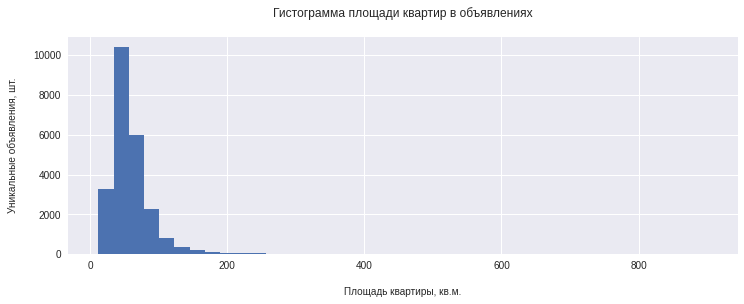

In [57]:
df.hist('total_area', bins=40,  figsize=(12,4)) # строим гистограмму по столбцу total_area
plt.title('Гистограмма площади квартир в объявлениях'+ "\n", size=12)
plt.xlabel("\n" + 'Площадь квартиры, кв.м.', size=10)
plt.ylabel('Уникальные объявления, шт.' + "\n", size=10)
plt.grid(True)

Пик находится около значения 50, это означает что большинство квартир в наших данных имеют площадь около 50 кв.м. 

Построим гистограмму для параметра цены квартиры, информация о цене находиться в столбце last_price.

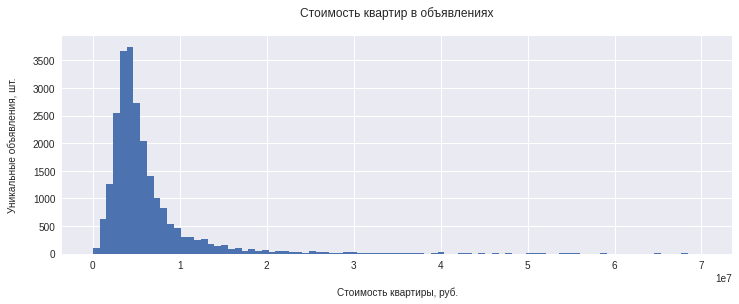

In [58]:
df.hist('last_price', bins=90, range=(0, 70000000), figsize=(12,4)) # строим гистограмму по столбцу last_price
plt.title('Стоимость квартир в объявлениях'+ "\n", size=12)
plt.xlabel("\n" + 'Стоимость квартиры, руб.', size=10)
plt.ylabel('Уникальные объявления, шт.' + "\n", size=10)
plt.grid(True)

Пик находится между значениями 4 и 5, это означет, что большинство квартир в данных стоят около 4,5 млн.руб. Также в нашей гистограмме мы видим очень длинный хвост, это означет что среднее значение цены продажи больше значения медианы.

Построим гистограмму для параметра колличества комнат квартиры, информация о комнатах находиться в столбце rooms.

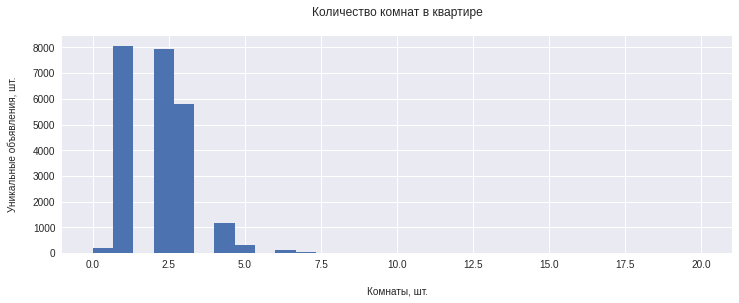

In [59]:
df.hist('rooms', bins=30, range=(0, 20), figsize=(12,4)) # строим гистограмму по столбцу rooms
plt.title('Количество комнат в квартире'+ "\n", size=12)
plt.xlabel("\n" + 'Комнаты, шт.', size=10)
plt.ylabel('Уникальные объявления, шт.' + "\n", size=10)
plt.grid(True)

Большинство квартир это однокомнатные и двухкомнатных квартиры. Также в данных встречаются и квартиры с большим колличеством комнат.

Построим гистограмму для параметра высоты потолков квартиры, информация о высоте потолков находиться в столбце ceiling_height.

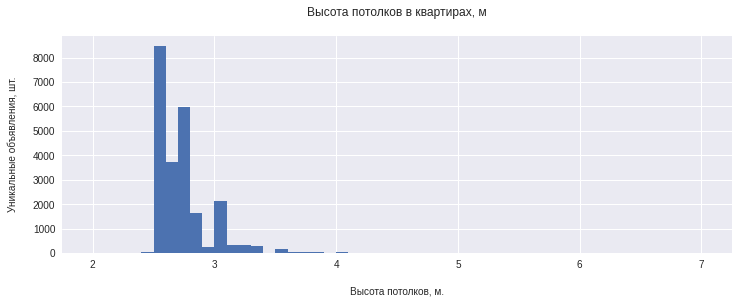

In [60]:
df.hist('ceiling_height', bins=50, range=(2, 7), figsize=(12,4)) # строим гистограмму по столбцу ceiling_height
plt.title('Высота потолков в квартирах, м'+ "\n", size=12)
plt.xlabel("\n" + 'Высота потолков, м.', size=10)
plt.ylabel('Уникальные объявления, шт.' + "\n", size=10)
plt.grid(True)

Все как в норме высота потолков около 2,5 м. Встречаются и квартиры с высокими потолками, даже выше чем в сталинках (ого).

После изучения данных параметров нам необходимо изучить время продажи квартиры. Построить гистограмму по этому параметру, посчитать для параметра среднее и медиану.

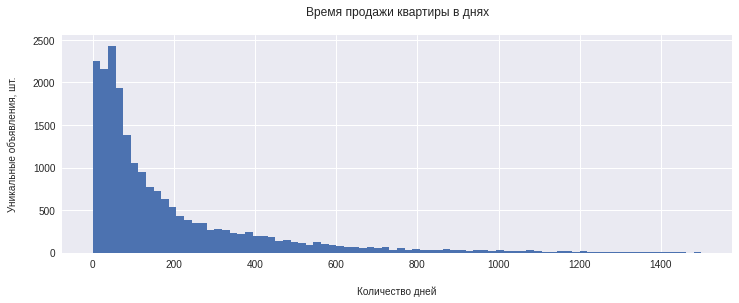

In [61]:
df.hist('days_exposition', bins=80, range=(0, 1500), figsize=(12,4)) # строим гистограмму по столбцу days_exposition
plt.title('Время продажи квартиры в днях'+ "\n", size=12)
plt.xlabel("\n" + 'Количество дней', size=10)
plt.ylabel('Уникальные объявления, шт.' + "\n", size=10)
plt.grid(True)

Пиковые значения на гистограмме приходятся на значение около 100 дней, получается, что большиство квартир из наших данных продаются около этого значения, у наших данных очень длинный "хвост" это явно отразиться на среднем значении продажи квартиры и среднее значение продажы будет явно больше.

Посмотрим на среднее значение и медиану столбца days_exposition.

In [62]:
df.describe() # описываем данные и смотрим необходимые значения необходимых показателей

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_week,month_exposition,year_exposition,living_to_total,kitchen_to_total
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23695.000000,18157.000000,...,8079.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23695.000000
mean,9.858475,6.541549e+06,60.120511,2.070636,2.735466,10.670176,34.321982,5.892358,9.794780,28793.672193,...,490.804555,0.770255,517.980900,180.888634,9.987413e+04,2.569307,6.400101,2017.367146,0.566423,0.175505
std,5.682529,1.088701e+07,35.665822,1.078405,0.994316,6.587781,21.700627,4.885249,6.101468,12630.880622,...,342.317995,0.938346,277.720643,219.727988,5.041842e+04,1.789082,3.491561,1.039771,0.111237,0.080695
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.400000,2.000000,6.300000,18585.000000,...,288.000000,0.000000,294.000000,45.000000,7.698551e+04,1.000000,3.000000,2017.000000,0.493147,0.121622
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.000000,26726.000000,...,455.000000,1.000000,502.000000,95.000000,9.545455e+04,3.000000,6.000000,2017.000000,0.568519,0.162791
75%,14.000000,6.800000e+06,69.000000,3.000000,2.750000,16.000000,42.700000,8.000000,11.440000,37273.000000,...,612.000000,1.000000,729.000000,232.000000,1.148649e+05,4.000000,10.000000,2018.000000,0.641394,0.225000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,84869.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.514286,0.787879


In [63]:
df['days_exposition'].mean().round() # считаем среднее время продажи недвижимости 

181.0

In [64]:
df['days_exposition'].median() # считаем показатель медианы столбца days_exposition

95.0

Среднее время продажи квартиры составляет 181 день, медиана составляет 95 дней.

In [65]:
df['days_exposition'].min() # находим минимальное значение столбца days_exposition

1.0

Минимальное время продажи квартиры в наших данных состовлет 1 день, думаю что это очень мало, основываясь на личном опыте минимальная продажа квартиры в норме составляет от двух недель.

In [66]:
df['days_exposition'].max() # находим максимальное значение столбца days_exposition

1580.0

Максимальное время продажи в данных составляет 1580 дней это достаточно много, примерно 4-5 лет.

Выполним следующий этап, рассмотрим редкие и выбивающиеся значения в наших данных.

In [67]:
df.columns # вывод названий столбцов таблицы 

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'price_per_meter',
       'first_day_exposition_new', 'day_week', 'month_exposition',
       'year_exposition', 'floor_level', 'living_to_total',
       'kitchen_to_total'],
      dtype='object')

Рассмотрим стоиймость недвижимости, она находиться в столбце last_price.

In [68]:
df['last_price'].sort_values(ascending=True).head(15) # сортируем значения столбца last_price методом sort_values и выведем первые 15 строк

8793      12190
17456    430000
14911    430000
16274    440000
17676    450000
16219    450000
9581     450000
5698     450000
21912    470000
18867    470000
23484    470000
16032    480000
6859     490000
10782    490000
2097     500000
Name: last_price, dtype: int64

In [69]:
df['last_price'].sort_values().tail(15) # сортируем значения столбца last_price методом sort_values и выведем последние 15 строк

1026     155000000
16495    159000000
2536     159984000
19155    160000000
19865    180000000
8900     190870000
5893     230000000
13749    240000000
16461    245000000
22831    289238400
15651    300000000
1436     330000000
14706    401300000
19540    420000000
12971    763000000
Name: last_price, dtype: int64

Среди объявлений есть достаточно маленькое значение стоимость недвижимости 12 190 рублей.
Максимальные значения цены выглядят реалистично, такие объявления действительно можно встретить.

Посмотрим на строчку объявления у которой стоймость равна 12 190 рублей.

In [70]:
df.query('last_price == 12190') # находим необходимую строку используя метод query

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,first_day_exposition_new,day_week,month_exposition,year_exposition,floor_level,living_to_total,kitchen_to_total
8793,7,12190,109,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,False,...,NaN,8.0,111.834862,2019-03-20,2,3,2019,последний,0.293578,0.37156


In [71]:
df = df.query('last_price > 400000') # оставим строки с суммой выше 400 000 рублей

За 12 190 рублей квартира площадью 109 кв.метров является шикарным подарком на рынке недвижимости.

Далее рассмотрим столбец total_area.

In [72]:
df['total_area'].sort_values().head(15) # сортируем значения столбца total_area методом sort_values и выведем первые 15 строк

19904    12
17961    13
19546    13
19807    13
19558    13
19642    14
16949    15
8886     15
12040    15
9412     16
21802    17
716      17
9157     17
10208    17
22356    17
Name: total_area, dtype: int64

У самой маленькой квартиры в наших данных площадь состовляет 12 кв.метров, вполне реалистично.

In [73]:
df['total_area'].sort_values().tail(15) # сортируем значения столбца total_area методом sort_values и выведем последние 15 строк

6221     470
660      483
6621     488
22494    491
9826     494
12401    495
15016    500
5893     500
8018     507
4237     517
5358     590
15651    618
12859    631
3117     631
19540    900
Name: total_area, dtype: int64

У самой большой квартиры в наших данных площадь состовляет 900 кв.метров, это достаточно большая площадь и это объявление вызывает сомнения. Оставим строки где площадь недвижимости менее 550 кв.м.

In [74]:
df = df.query('total_area < 550') # оставляем строки где в столбце total_area стоит значение меньше чем 550 кв.м

Изучив объявления о продаже квартир в Санкт-Петербурге я нашел подобное обьявление с продажей квартиры площадь которой более 900 кв.м. Данную строку можно оставить ориентируясь на колличество комнат, цену продажи, выглядит правдоподобно. 

Далее рассмотрим количество комнат.

In [75]:
df['rooms'].value_counts() # вывод количества объявлений по количеству комнат

1     8047
2     7939
3     5814
4     1180
5      326
0      197
6      105
7       56
8       12
9        8
10       3
11       2
14       2
16       1
19       1
Name: rooms, dtype: int64

Думаю что больше 8 комнат это перебор, поэтому уберем строки где количество комнат больше 8.

In [76]:
df = df.query('rooms < 9') # оставляем строки где меньше 9 комнат в квартире

Избавились от небольшого количества строк, можем продолжать.

In [77]:
df['ceiling_height'].sort_values() # сортируем информацию столбца ceiling_height чтобы увидеть минимальные и максимальные значения высоты потолков

22590      1.00
5712       1.20
16934      1.75
4212       2.00
11352      2.00
          ...  
17857     27.00
21377     27.50
22336     32.00
3148      32.00
22869    100.00
Name: ceiling_height, Length: 23676, dtype: float64

In [78]:
df.query('ceiling_height > 6').head() # вывод первых пяти строчек df, где потолки выше 6 метров

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,first_day_exposition_new,day_week,month_exposition,year_exposition,floor_level,living_to_total,kitchen_to_total
355,17,3600000,55,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,...,NaN,259.0,65454.545455,2018-07-12,3,7,2018,другой,0.581818,0.046364
397,15,5990000,54,2018-03-22T00:00:00,2,14.85,36.0,21.4,28,False,...,80.0,11.0,110925.925926,2018-03-22,3,3,2018,другой,0.396296,0.346296
3148,14,2900000,75,2018-11-12T00:00:00,3,32.00,3.0,53.0,2,False,...,NaN,NaN,38666.666667,2018-11-12,0,11,2018,другой,0.706667,0.106667
3474,3,1400000,30,2018-03-16T00:00:00,1,8.00,5.0,15.3,2,False,...,NaN,125.0,46666.666667,2018-03-16,4,3,2018,другой,0.510000,0.243333
4643,0,4300000,45,2018-02-01T00:00:00,2,25.00,9.0,30.0,2,False,...,331.0,181.0,95555.555556,2018-02-01,3,2,2018,другой,0.666667,0.155556


In [79]:
df.query('ceiling_height < 2.4').head() # вывод первых пяти строчек df, где потолки ниже 2,4 метра

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,first_day_exposition_new,day_week,month_exposition,year_exposition,floor_level,living_to_total,kitchen_to_total
227,13,2200000,47,2018-01-12T00:00:00,3,2.34,5.0,45.0,1,False,...,NaN,45.0,46808.510638,2018-01-12,4,1,2018,первый,0.957447,0.055319
552,11,2999000,33,2017-03-30T00:00:00,1,2.00,15.0,17.5,6,False,...,949.0,270.0,90878.787879,2017-03-30,3,3,2017,другой,0.530303,0.196970
1582,4,4100000,45,2016-01-13T00:00:00,2,2.30,9.0,28.4,8,False,...,525.0,329.0,91111.111111,2016-01-13,2,1,2016,другой,0.631111,0.155556
2572,4,2400000,62,2018-12-27T00:00:00,3,2.00,5.0,40.0,4,False,...,NaN,NaN,38709.677419,2018-12-27,3,12,2018,другой,0.645161,0.096774
4212,1,2120000,35,2017-12-18T00:00:00,1,2.00,18.0,16.6,9,False,...,NaN,36.0,60571.428571,2017-12-18,0,12,2017,другой,0.474286,0.251429


Квартиры с высотой от 4-5 метров, могут встречаться в реальной жизни и их не так много, но от 6 метров в высоту их практически нет, уберем строчки с данными о квартирах высота потолков которых более 6 метров и меньше 2.4.

In [80]:
df = df.query('2.4 <= ceiling_height < 6')

In [81]:
df['ceiling_height'].sort_values() # проверяем высоту потолков после изменений в df

22372    2.4
1322     2.4
17601    2.4
20564    2.4
12069    2.4
        ... 
1026     5.3
12628    5.3
7578     5.5
1388     5.6
21227    5.8
Name: ceiling_height, Length: 23624, dtype: float64

Готово, далее посмотрим колличество этажей в доме.

In [82]:
df['floors_total'].sort_values(ascending=True) # смотрим минимальную и максимальную этажность домов 

9517      1.0
22550     1.0
8335      1.0
21603     1.0
17744     1.0
         ... 
2966     35.0
20938    35.0
11079    36.0
16731    52.0
2253     60.0
Name: floors_total, Length: 23624, dtype: float64

В Санкт-Петербурге есть один жилой дом который является самым высоким в городе и колличество этажей в этом доме 37, откинем все строки в таблице где этажность состовляет более 37.

In [83]:
df.query('floors_total > 37') # смотрим строки где этаж больше 37

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,first_day_exposition_new,day_week,month_exposition,year_exposition,floor_level,living_to_total,kitchen_to_total
2253,12,3800000,45,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,False,...,614.0,166.0,84444.444444,2018-06-28,3,6,2018,другой,0.608889,0.164444
16731,9,3978000,40,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,False,...,NaN,45.0,99450.000000,2018-09-24,0,9,2018,другой,0.262500,0.350000


Отбросим эти строки

In [84]:
df = df.query('floors_total <= 37')

Успех! Идем далее.

Рассмотрим время продажи квартиры. Предпологаю, что в норме продажа квартиры может составлять от 12 до 700 дней.

In [85]:
df.query('12 < days_exposition < 700')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,first_day_exposition_new,day_week,month_exposition,year_exposition,floor_level,living_to_total,kitchen_to_total
1,7,3350000,40,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,...,NaN,81.0,83750.000000,2018-12-04,1,12,2018,первый,0.465000,0.275000
2,10,5196000,56,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,...,574.0,558.0,92785.714286,2015-08-20,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159,2015-07-24T00:00:00,3,2.60,14.0,45.0,9,False,...,234.0,424.0,408176.100629,2015-07-24,4,7,2015,другой,0.283019,0.016981
4,2,10000000,100,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,48.0,121.0,100000.000000,2018-06-19,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,...,NaN,55.0,96333.333333,2018-09-10,0,9,2018,другой,0.480000,0.303333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000,72,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,False,...,806.0,519.0,131527.777778,2016-10-13,3,10,2016,другой,0.559722,0.147222
23692,2,1350000,30,2017-07-07T00:00:00,1,2.55,5.0,17.5,4,False,...,NaN,413.0,45000.000000,2017-07-07,4,7,2017,другой,0.583333,0.200000
23693,9,4600000,62,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,False,...,675.0,239.0,74193.548387,2016-08-05,4,8,2016,другой,0.645161,0.129032
23695,14,3100000,59,2018-01-15T00:00:00,3,2.55,5.0,38.0,4,False,...,NaN,45.0,52542.372881,2018-01-15,0,1,2018,другой,0.644068,0.144068


In [86]:
df = df.query('12 < days_exposition < 700')

In [87]:
len(df) # смотрим длинну df

18215

Мы убрали редкие значения и можно переходить к следующему шагу. В нашей таблице осталось 18215 строк.

Далее изучим факторы, которые больше всего влияют на стоимость квартиры. Посмотрим завист ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом и зависимость от даты размещения: дня недели, месяца и года.

Смотрим зависимость цены и площади квартиры.

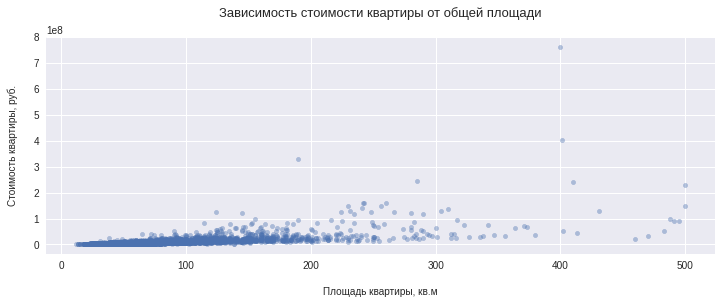

In [88]:
df.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha = .4, figsize=(12,4))
plt.title('Зависимость стоимости квартиры от общей площади'+ "\n", size=13)
plt.xlabel("\n" + 'Площадь квартиры, кв.м', size=10)
plt.ylabel('Стоимость квартиры, руб.' + "\n", size=10)
plt.grid(True)

Видно, что есть прямая зависимость между ценой и общей площадью недвижимости.

Посмотрим, корреляцию этих параметров с помощью метода corr.

In [89]:
df['last_price'].corr(df['total_area'])

0.6118124453025569

Между параметрами сильная зависимость коэффициент корреляции составляет 0.61, что говорит нам о том, что если цена увеличивается, то скорее всего и площадь в квартире увеличится.

Идем далее и посмотрим зависимость числа комнат и цены квартиры.

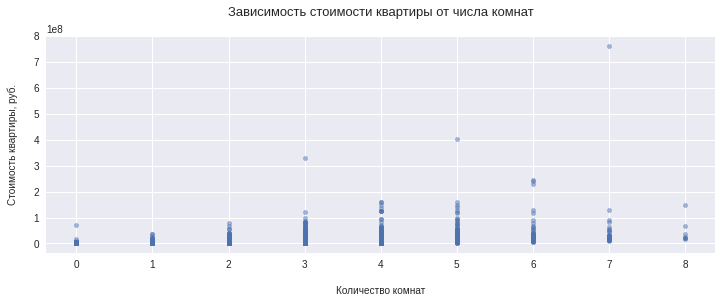

In [90]:
df.plot(x='rooms', y='last_price', kind='scatter', grid=True, alpha = .5, figsize=(12,4))
plt.title('Зависимость стоимости квартиры от числа комнат'+ "\n", size=13)
plt.xlabel("\n" + 'Количество комнат', size=10)
plt.ylabel('Стоимость квартиры, руб.' + "\n", size=10)
plt.grid(True)

На графике видно, что с увеличением комнат увеличивается и цена квартиры. Посмотрим коэффициент корреляции:

In [91]:
df['last_price'].corr(df['rooms'])

0.3392572069735174

Между параметрами прямая зависимость коэффициент корреляции составляет 0.34, что говорит нам о том, что если цена увеличится, то возможно и количиство комнат увеличится.

Далее смотрим зависимость цены и расстояния до центра.

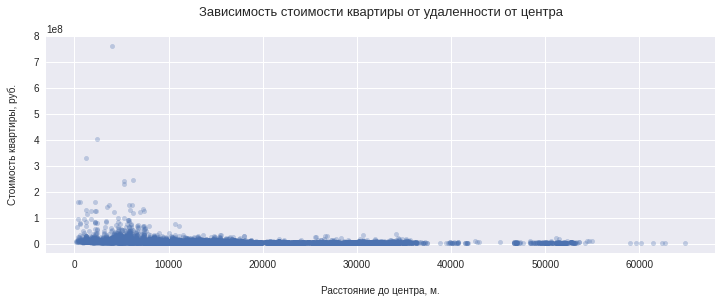

In [92]:
df.plot(x='city_centers_nearest', y='last_price', kind='scatter', grid=True, alpha = .3, figsize=(12,4))
plt.title('Зависимость стоимости квартиры от удаленности от центра'+ "\n", size=13)
plt.xlabel("\n" + 'Расстояние до центра, м.', size=10)
plt.ylabel('Стоимость квартиры, руб.' + "\n", size=10)
plt.grid(True)

На графике видно, что стоймость квартир выше, если растояние до центра меньше, скорее всего тут будет обратная зависимость.

In [93]:
df['last_price'].corr(df['city_centers_nearest'])

-0.19625203650955597

Как и предпологалось между параметрами обратня зависимость. Ближе к центру, значит дороже.

Далее смотрим зависимость цены и этажа на котором располагается квартира.

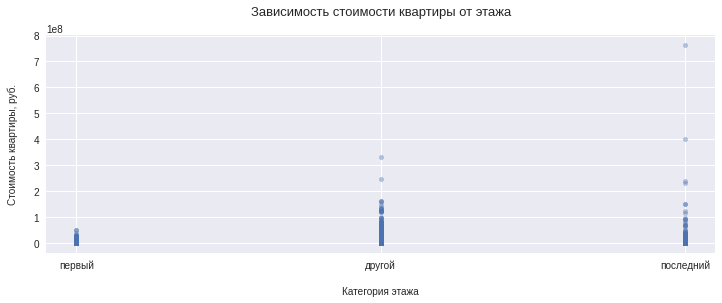

In [94]:
df.plot(x='floor_level', y='last_price', kind='scatter', grid=True, alpha = .4, figsize=(12,4))
plt.title('Зависимость стоимости квартиры от этажа'+ "\n", size=13)
plt.xlabel("\n" + 'Категория этажа', size=10)
plt.ylabel('Стоимость квартиры, руб.' + "\n", size=10)
plt.grid(True)

In [95]:
df['floor_level'].value_counts()

другой       13473
последний     2502
первый        2240
Name: floor_level, dtype: int64

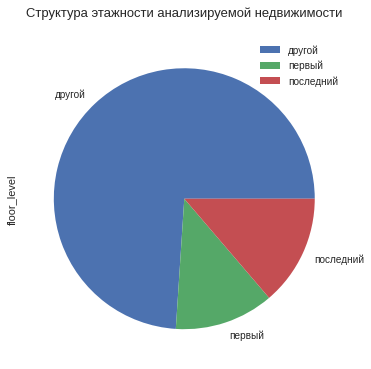

In [96]:
df.groupby('floor_level')['floor_level'].count().plot(y='floor_level', kind='pie', figsize=(6,6))
plt.legend()
plt.title('Структура этажности анализируемой недвижимости' + "\n", size=13)
plt.grid(True)

In [97]:
df_kor = pd.DataFrame({'признак': ['да', 'нет'], 'count': [129, 45], 'per' : [74.14, 25.86]})

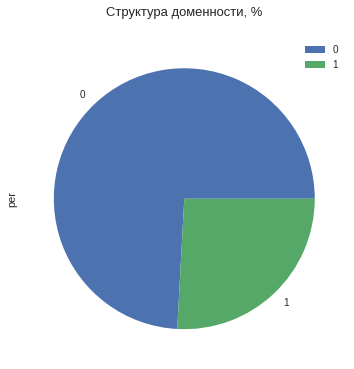

In [98]:
df_kor.plot(y='per', kind='pie', figsize=(6,6))
plt.legend()
plt.title('Структура доменности, %' + "\n", size=13)
plt.grid(True)

Количество квартир находящихся на первом и последенм этаже примерно одинаково. На графике можно увидеть, что стоимость квартир находящихся на первом этаже значительно ниже, чем стоимость квартир на остальных этажах. В основном квартиры "подороже" находятся между первым и последним этажами, также есть небольшое количество дорогих квартир которые находятся на последнем этаже.

Далее рассмотрим зависимость от дня недели, месяца и года.

<AxesSubplot:xlabel='day_week', ylabel='last_price'>

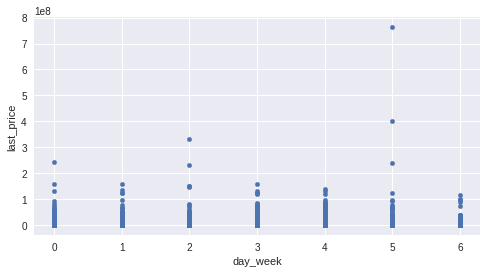

In [99]:
df.plot(x='day_week', y='last_price', kind='scatter', figsize=(8, 4), grid=True)

На графике видно, что недорогие квартиры распределены равномерно на протяжении всех недель, самая дорогая квартира была продана в субботу.

In [100]:
df['day_week'].value_counts() # считаем количество проданых квартир в разные дни недели

3    3340
1    3197
4    3168
2    3025
0    2700
5    1496
6    1289
Name: day_week, dtype: int64

Большинство квартир продано в четверг, меньше всего было продано в воскресение всего 1289 продаж.

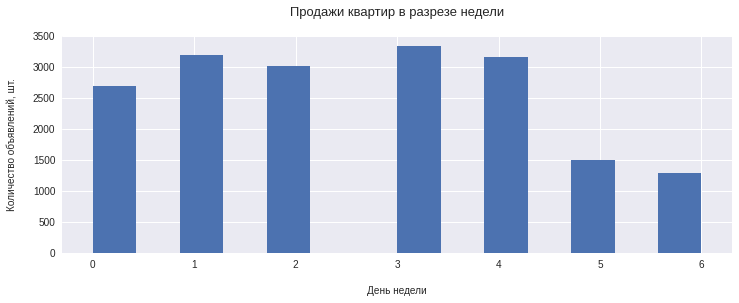

In [101]:
df.hist('day_week', bins=14, figsize=(12,4))
plt.title('Продажи квартир в разрезе недели'+ "\n", size=13)
plt.xlabel("\n" + 'День недели', size=10)
plt.ylabel('Количество объявлений, шт.' + "\n", size=10)
plt.grid(True)

График отражает наш предыдущий вывод: четверг в топе продаж.

Далее посмотрим на месяц продаж.

In [102]:
df['month_exposition'].value_counts() # считаем количество проданых квартир в разные месяцы года

2     2075
11    1892
10    1723
3     1678
9     1611
6     1541
8     1464
7     1419
4     1314
12    1290
1     1140
5     1068
Name: month_exposition, dtype: int64

Чаще всего продают квартиру в марте, реже всего в июне. 

Построим гистограмму по столбцу month_exposition.

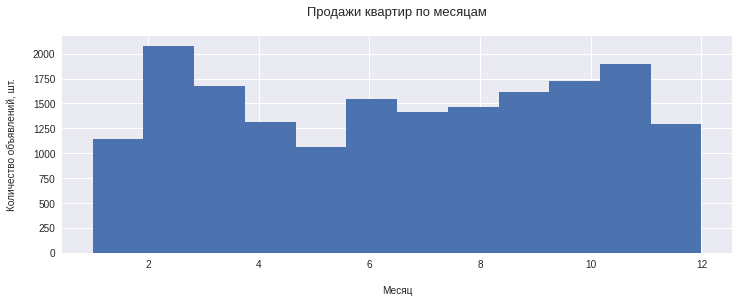

In [103]:
df.hist('month_exposition', bins=12, range=(1,12), figsize=(12,4))
plt.title('Продажи квартир по месяцам'+ "\n", size=13)
plt.xlabel("\n" + 'Месяц', size=10)
plt.ylabel('Количество объявлений, шт.' + "\n", size=10)
plt.grid(True)

Гистограмма отражает наш предыдущий вывод. Видим, что январе и мае меньше всего продаж.

Рассмотрим продажи по годам.

In [104]:
df['year_exposition'].value_counts() # считаем количество проданых квартир по годам

2017    7401
2018    6900
2016    2381
2019     810
2015     682
2014      41
Name: year_exposition, dtype: int64

Чаще всего квартиры были проданы в 2017 году, меньше всего в 2014, возможно компания начала инвестировать в рекламу сервиса и с 2015 года мы видим тенденцию к росту. В 2019 году продаж было не много, думаю это связано с тем, что 2019 год не закончен и данные были представлены до определенного месяца 2019 года.

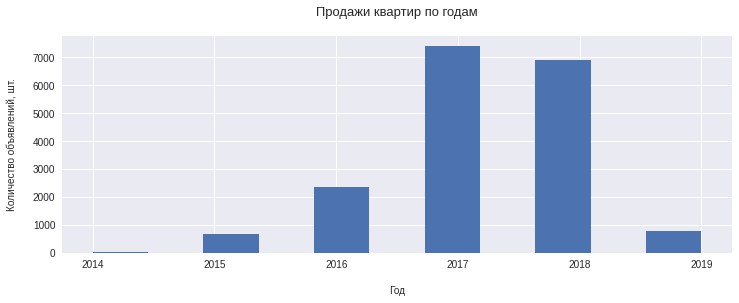

In [105]:
df.hist('year_exposition', bins=11, figsize=(12,4))
plt.title('Продажи квартир по годам'+ "\n", size=13)
plt.xlabel("\n" + 'Год', size=10)
plt.ylabel('Количество объявлений, шт.' + "\n", size=10)
plt.grid(True)

График отражает предыдущий вывод.

Далее сделаем топ 10 населенных пунктов с наибольшим числом объявлений. Посчитаем колличество и отметим населенные пункты.

In [106]:
total_ad = df['locality_name'].value_counts() # считаем количество объявлений и сохраняем в переменной total_ad
total_ad.head(10) # вывод первых 10 строк total_ad

Санкт-Петербург      12035
посёлок Мурино         453
посёлок Шушары         369
Всеволожск             311
Колпино                277
посёлок Парголово      270
Пушкин                 269
деревня Кудрово        261
Гатчина                230
Выборг                 189
Name: locality_name, dtype: int64

Неудивительно, Санкт-Петербург оказался на первом месте по количеству объявлений.

Посмотрим какие цены за кв.м. в нашем топе, думаю что северная столица будет на первом месте.

In [107]:
top_10_ad = ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово', 'Выборг']

df_10_ad = df[df['locality_name'].isin(top_10_ad)].pivot_table(index='locality_name', values='price_per_meter', aggfunc=['mean']) 
df_10_ad.columns = ['price_per_meter']
df_10_ad.sort_values(by='price_per_meter', ascending=False).round()

,price_per_meter
locality_name,
Санкт-Петербург,112498.0
Пушкин,102033.0
деревня Кудрово,93032.0
посёлок Парголово,89538.0
посёлок Мурино,86722.0
посёлок Шушары,78334.0
Колпино,74861.0
Всеволожск,69181.0
Гатчина,67833.0


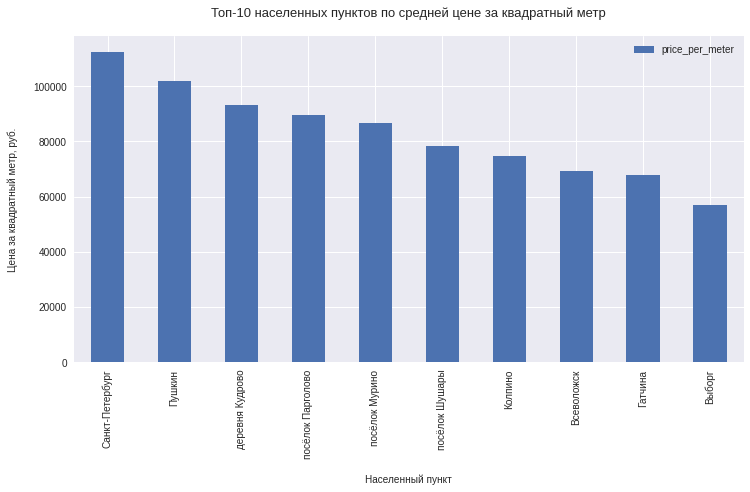

In [108]:
df_10_ad.sort_values(by='price_per_meter', ascending=False).plot(kind = 'bar',figsize=(12,6))
plt.title('Топ-10 населенных пунктов по средней цене за квадратный метр'+ "\n", size=13)
plt.xlabel("\n" + 'Населенный пункт', size=10)
plt.ylabel('Цена за квадратный метр, руб.' + "\n", size=10)
plt.grid(True)

Питер является лидером в нашем топе по цене за квадратный метр, данный показатель составляет 112550 рублей, такой же показатель в Выборге практически в два раза меньше - 57116 рублей.

Далее выделим квартиры, которые находяться в Санкт-Петербурге и создадим столбец в котором посчитаем расстояние до центра в километрах.

In [109]:
df_saint_p = df.query('locality_name == "Санкт-Петербург"')

In [110]:
pd.options.mode.chained_assignment = None

In [111]:
len(df_saint_p) # смотрим длинну df_saint_p

12035

Данные с информацией о недвижимости Санкт-Петербурга записаны в переменную df_saint_p, длинна таблицы составляет 12044 строк.
Следующий шаг это создание столбца с расстоянием до центра в километрах, сделаем это.

In [112]:
df_saint_p['city_centers_nearest_km'] = df_saint_p['city_centers_nearest'] / 1000
df_saint_p['city_centers_nearest_km'] = df_saint_p['city_centers_nearest_km'].round()

In [113]:
df_saint_p.head() # вывод первых пяти строк df_saint_p

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_meter,first_day_exposition_new,day_week,month_exposition,year_exposition,floor_level,living_to_total,kitchen_to_total,city_centers_nearest_km
2,10,5196000,56,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,...,558.0,92785.714286,2015-08-20,3,8,2015,другой,0.612500,0.148214,14.0
3,0,64900000,159,2015-07-24T00:00:00,3,2.60,14.0,45.0,9,False,...,424.0,408176.100629,2015-07-24,4,7,2015,другой,0.283019,0.016981,7.0
4,2,10000000,100,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,121.0,100000.000000,2018-06-19,1,6,2018,другой,0.320000,0.410000,8.0
9,18,5400000,61,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,False,...,289.0,88524.590164,2017-02-26,6,2,2017,другой,0.714754,0.106557,15.0
10,5,5050000,39,2017-11-16T00:00:00,1,2.67,12.0,20.3,3,False,...,137.0,129487.179487,2017-11-16,3,11,2017,другой,0.520513,0.217949,14.0


Столбец city_centers_nearest_km создан, построим график и посмотрим где находится центр Санкт-Петербурга.

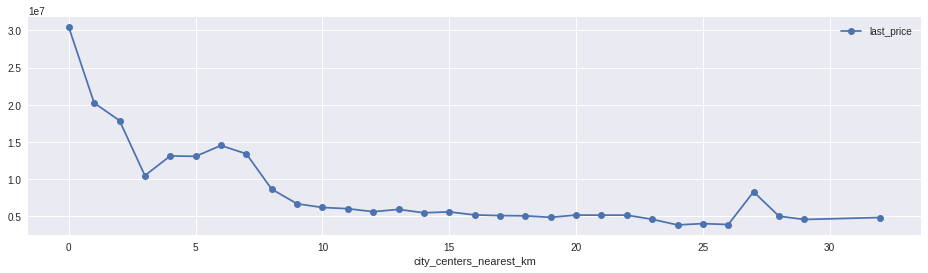

In [114]:
df_saint_p_table = df_saint_p.pivot_table(index='city_centers_nearest_km', values='last_price').plot(grid=True, style='o-', figsize = (16,4))

На графике можно отследить две точки где значения резко меняются это точка в промежутке трех километров, но после нее идет рост, предполагаю Крестовский остров сыграл большую роль в данных и на графике произошел рост, вторая точка находиться примерно в 7 километрах от центра будем считать ее за центр города.

In [115]:
df_center = df_saint_p[df_saint_p['city_centers_nearest_km'] <= 7] # сохраняем в переменной df_center строки с центром Санкт-Петербургом

In [116]:
len(df_center) # смотрим длинну df_center

2532

У нас 2537 объектов жилой недвижимости расположенных в центре Санкт-Петербурга. Проанализируем эти объявления и сравним с общими выводами по всей базе.

Автоматизируем построение гистограмм.

In [117]:
df_center_columns = ['total_area','last_price','rooms','ceiling_height'] # создаем список с столбцами df_center_columns, информация этих столбцов необходима для анализа, по ним мы будем строить гистограммы.

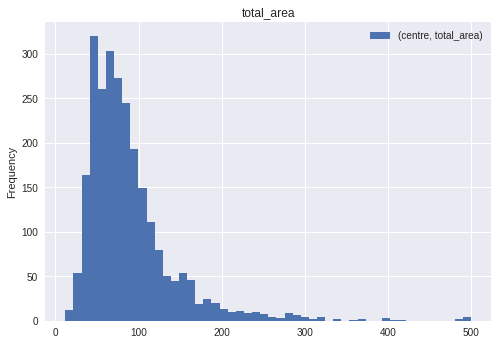

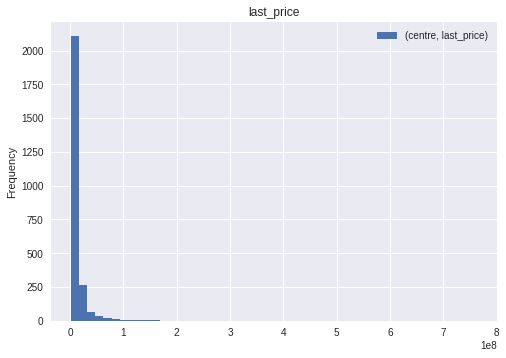

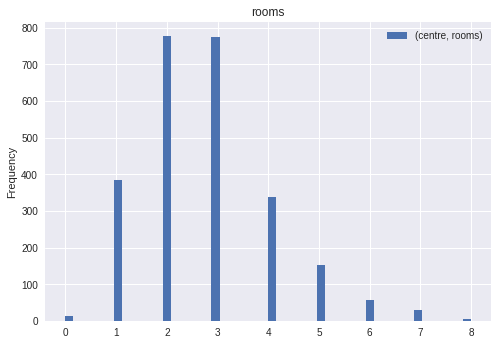

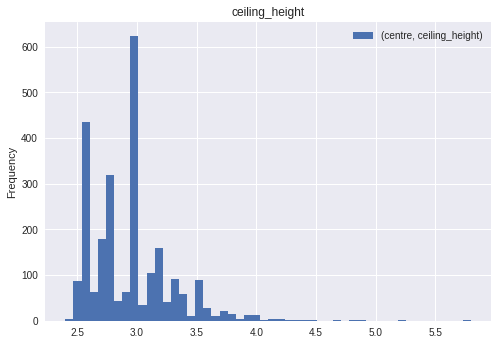

In [118]:
for column in df_center_columns: # автоматизируем построение гистограмм 
    df_center.plot(kind='hist', y=column, bins = 50, label=('centre', column), grid = True, legend=True)
    plt.legend()
    plt.title(column);
    plt.show()

Гистограммы построены сделаем выводы по ним и сравним с предыдущими выводами таблицы df с общей информацией по всем городам.

Гисторгамма с информацией об общей площади жилья показывает, что у нас есть пик в районе 70 кв.м. - это значит, что большинство квартир которые продаются в центре имеют площадь около 70 кв.м. Также мы видим длинных хвост в сторону увеличения кв.м., но таких картир не много, такие квартиры с большой площадью могут сильно повлиять на среднее значение параметра 'общая площадь'. В предыдущих расчетах пик данного показателя был около 50 кв.м. можно сказать, что в центре Санкт-Петербурга в основном квартиры больше по площади.

Гисторгамма с информацией о цене продажи показывает, что у нас есть пик находится на уровне 9 миллионов рублей, что в два раза больше чем в общих данных, там пик составлял 4,5 миллионов рублей. Все логично в центре Питера и квартиры дороже, чем в области и на окраинах города.

Гисторгамма с информацией о количествке комнат показывает нам, что большинство продаваемых квартир являются двух и трех комнатными, на предыдущей гистограмме с информацией по общей базе было тоже два пика, но отличие в том, что там чаще встречались однушки и двушки.

Гисторгамма с информацией о высоте потолков в квартирах центра Санкт-Петербурга, показывает что чаще всего встречаются квартиры с высокими потолками 3 метра в выстоу. также достаточно много квартир с привычной выстой потолков 2,6-2,7 метров. В общих данных нам чаще всего попадались потолки стандартной высоты 2.6 метров.

Посмторим корреляцию цены и параметров квартир, которые находятся в центре Санкт-Петербурга.

In [119]:
df_center.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,day_week,month_exposition,year_exposition,living_to_total,kitchen_to_total,city_centers_nearest_km
total_images,1.000000,0.117964,0.078781,0.054986,0.073987,-0.012330,0.067418,0.022932,0.021901,-0.034755,...,-0.000851,-0.000117,-0.015206,0.152654,0.037577,0.022051,0.122183,-0.029087,0.065838,0.007586
last_price,0.117964,1.000000,0.593467,0.320026,0.114447,0.043679,0.488073,0.113662,-0.000386,-0.022878,...,0.086832,-0.067490,0.065623,0.827902,0.032704,-0.008209,-0.062733,-0.065287,-0.098709,-0.048024
total_area,0.078781,0.593467,1.000000,0.746099,0.270447,-0.001940,0.891382,0.109774,0.001138,-0.059652,...,0.006587,-0.069946,0.146006,0.285270,0.004579,-0.010189,-0.106892,0.033764,-0.291643,-0.100606
rooms,0.054986,0.320026,0.746099,1.000000,0.246143,-0.175422,0.828448,-0.045506,0.022764,-0.140507,...,-0.039631,-0.045679,0.137028,0.035032,-0.012476,0.004779,-0.091828,0.384965,-0.430941,-0.168437
ceiling_height,0.073987,0.114447,0.270447,0.246143,1.000000,-0.278775,0.304269,-0.171117,0.011689,0.038196,...,0.022401,-0.053394,0.097730,0.052998,-0.032693,-0.009164,-0.003225,0.127275,-0.078224,-0.253826
floors_total,-0.012330,0.043679,-0.001940,-0.175422,-0.278775,1.000000,-0.124208,0.682748,-0.006846,0.004178,...,-0.025254,0.013022,-0.045563,0.118975,0.034834,-0.000792,-0.007880,-0.332588,0.142997,0.359076
living_area,0.067418,0.488073,0.891382,0.828448,0.304269,-0.124208,1.000000,0.003149,0.034841,-0.043561,...,-0.003919,-0.052594,0.139765,0.184943,-0.008859,-0.000335,-0.099621,0.392309,-0.385078,-0.155174
floor,0.022932,0.113662,0.109774,-0.045506,-0.171117,0.682748,0.003149,1.000000,-0.012885,-0.018615,...,-0.032356,-0.020380,-0.020380,0.133519,0.047737,0.018035,-0.009591,-0.222652,0.037829,0.239192
is_apartment,0.021901,-0.000386,0.001138,0.022764,0.011689,-0.006846,0.034841,-0.012885,1.000000,-0.002745,...,0.025594,-0.010966,-0.035982,-0.002958,-0.047009,-0.010064,0.027190,0.089994,-0.021994,-0.024476
studio,-0.034755,-0.022878,-0.059652,-0.140507,0.038196,0.004178,-0.043561,-0.018615,-0.002745,1.000000,...,0.007350,0.017627,-0.040700,-0.001498,-0.001734,0.002745,0.022534,0.077070,-0.125910,0.012231


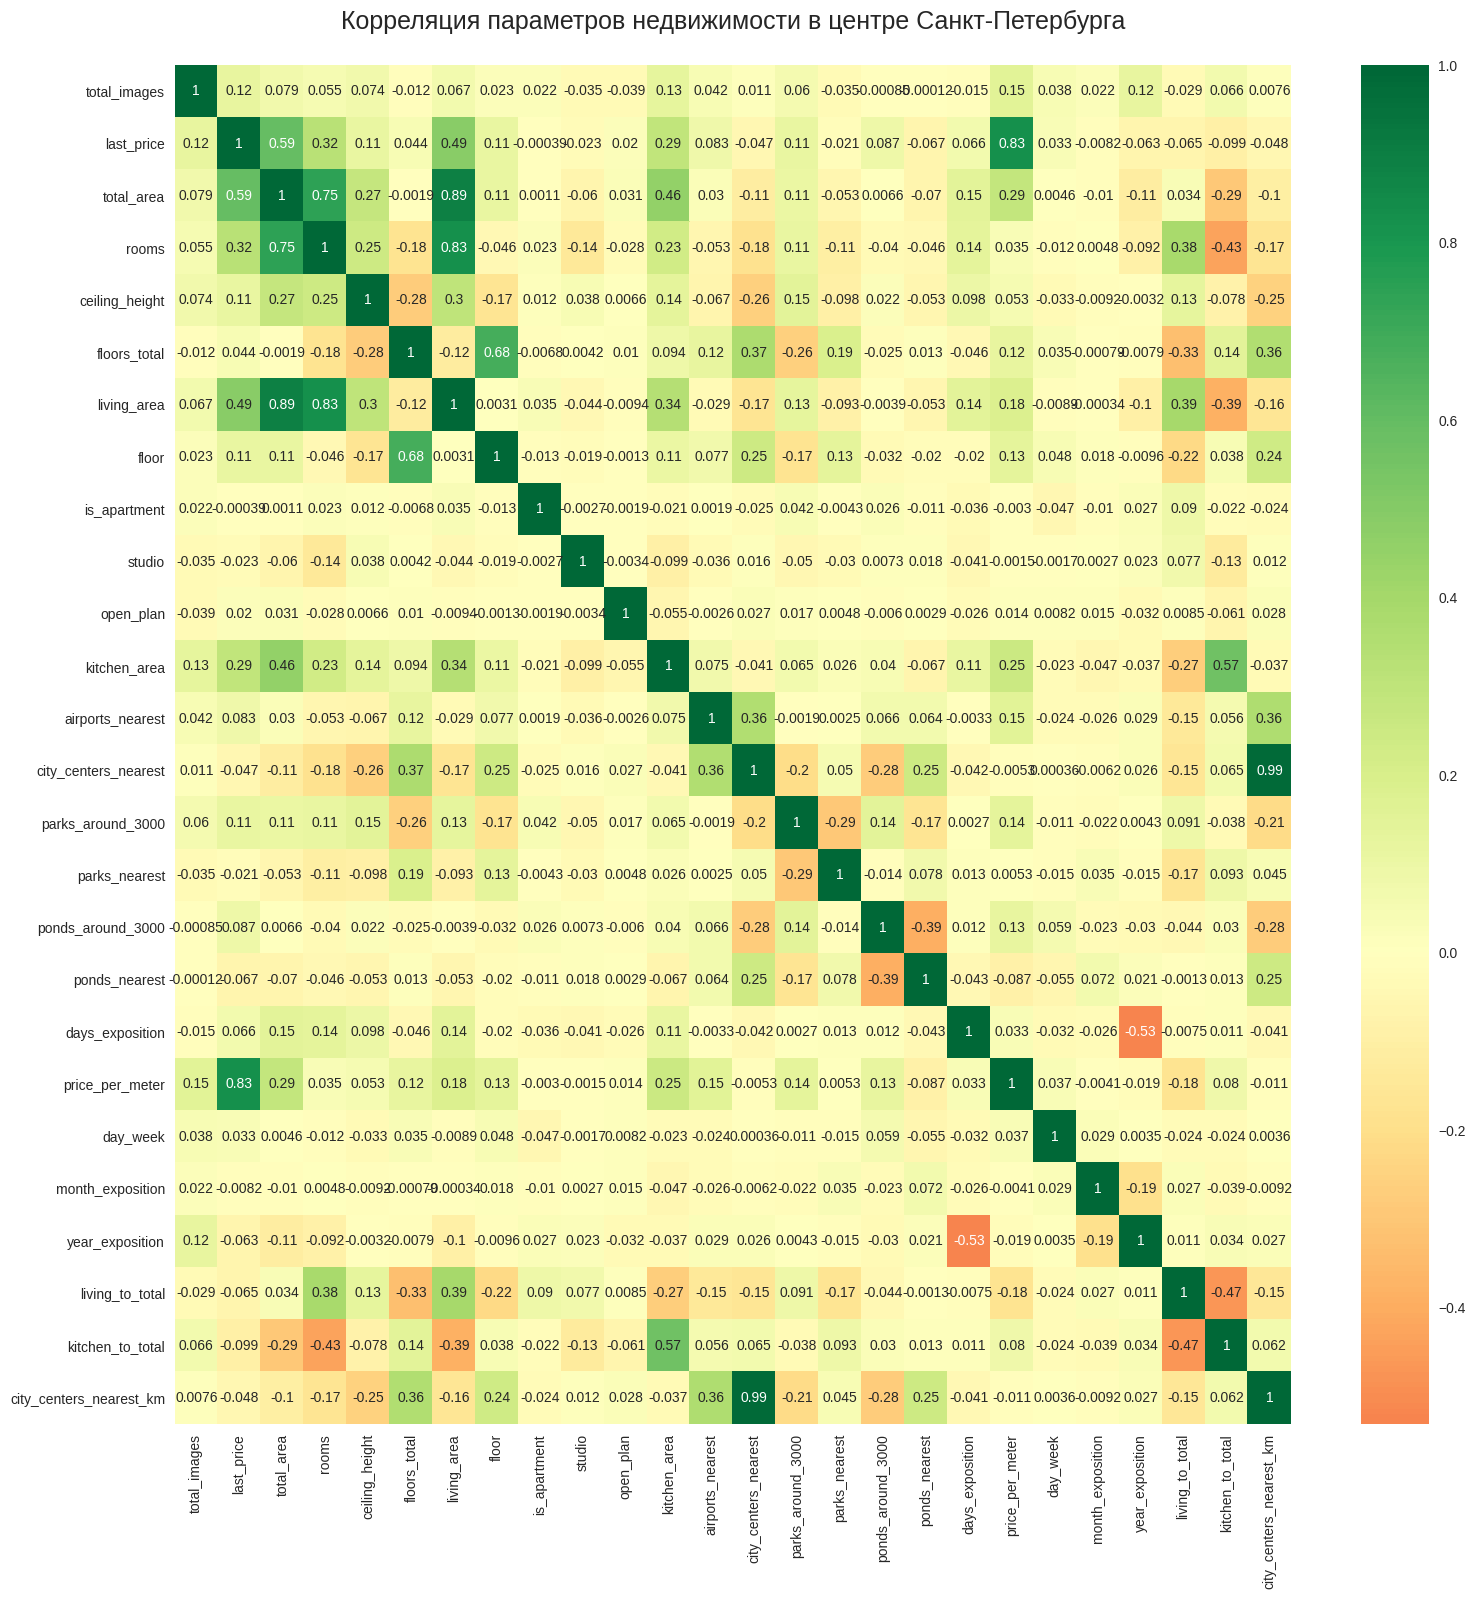

In [120]:
# Plot
plt.figure(figsize=(18,18), dpi=100)
sns.heatmap(df_center.corr(), xticklabels=df_center.corr().columns, yticklabels=df_center.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Корреляция параметров недвижимости в центре Санкт-Петербурга' + "\n", fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Визуально можно сделать следующие выводы:
- Цена на недвижимость растет если площадь квартиры увеличивается, тут прямая зависимость, коэффициент корреляции составил 0,59;
- Цена на недвижимость растет если жилая площадь увеличивается, коэффициент корреляции составил 0,49;
- Цена на недвижимость растет если количество комнат больше, коэффициент корреляции составил 0,32.

Рассмотрим параметры подробнее.

Посмотрим зависимость цены недвижимости в центре Санкт-Петербурга и основных параметров (общая площадь, количества комнат, высоты потолков).

In [121]:
df_center['last_price'].corr(df_center['total_area']) # коэффициент корреляции между ценой и общей площадью

0.5934667030914669

Между параметрами сильная зависимость коэффициент корреляции положительный и составляет 0.59, что говорит нам о том, что если цена увеличивается, то и площадь в квартире увеличится. В общем датафрейме данный показатель составил 0,61.

Посмотрим визуально на зависимость цены и общей площади.

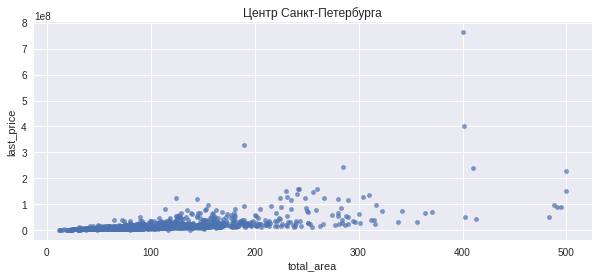

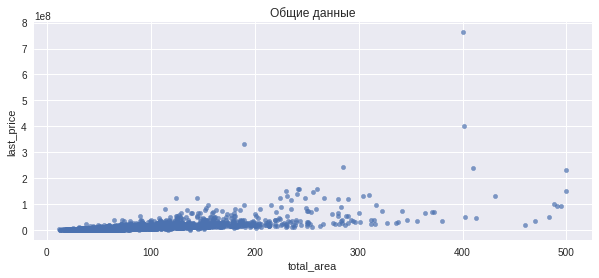

In [122]:
df_center.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha = .7, figsize=(10,4))
plt.title('Центр Санкт-Петербурга');
plt.show()

df.plot(x='total_area', y='last_price', kind='scatter', grid=True, alpha = .7, figsize=(10,4))
plt.title('Общие данные');
plt.show()

На графике видно, что большие квартиры из наших данных в основном находятся в центре Питера. Как говорилось ранее больше площадь - выше цена.

Далее посмотрим зависимость цены от количества комнат.

In [123]:
df_center['last_price'].corr(df_center['rooms']) # коэффициент корреляции между ценой и количеством комнат

0.3200255077792445

Между параметрами прямая зависимость коэффициент корреляции составляет 0.32, что говорит нам о том, прямая зависимость говорит о том, при увеличении одного параметра второй параметр тоже изменяется, у нас так и произошло чем больше комнат тем выше цена. В общем датафрейме данный показатель составил 0.34

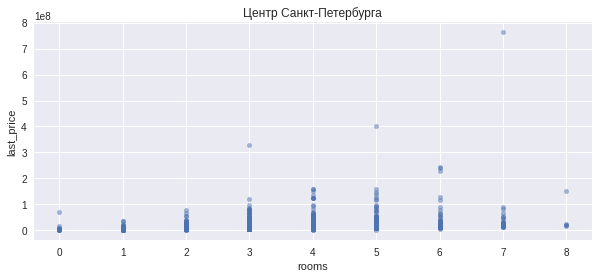

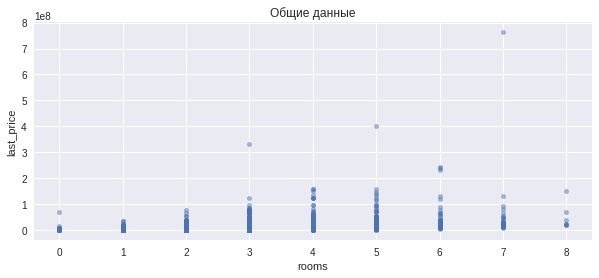

In [124]:
df_center.plot(x='rooms', y='last_price', kind='scatter', grid=True, alpha = .5, figsize=(10,4))
plt.title('Центр Санкт-Петербурга');
plt.show()

df.plot(x='rooms', y='last_price', kind='scatter', grid=True, alpha = .5, figsize=(10,4))
plt.title('Общие данные');
plt.show()

Также большое количество комнат находится в центре Санкт-Петербурга, но так же видно что и вне центра есть точки которые показывают на наличие большого количества комнат. И там и там соблюдается логичное условие, больше комнат - больше цена.

Далее посмотрим зависимость цены от высоты потолков.

In [125]:
df_center['last_price'].corr(df_center['ceiling_height']) # коэффициент корреляции между ценой и высотой потолков

0.1144471213542427

Мы видим, что коэффициент корреляции между ценой и высотой потолков в центре Санкт-Петербурга составляет 0.11, зависимость есть, но она не сильная, насколько мне известно в центре Петербурга много комуналок и они могут уменьшить значение коэффициента корреляции, так как цена на комнаты относительно недвижимости центра Санкт-Петербурга небольшая. 

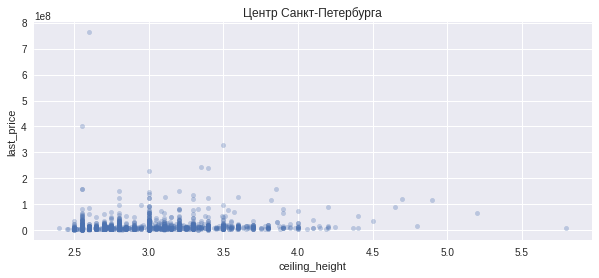

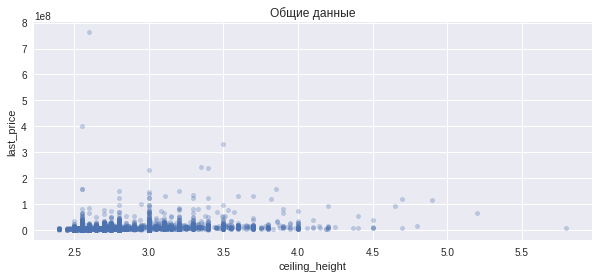

In [126]:
df_center.plot(x='ceiling_height', y='last_price', kind='scatter', grid=True, alpha = .3, figsize=(10,4))
plt.title('Центр Санкт-Петербурга');
plt.show()

df.plot(x='ceiling_height', y='last_price', kind='scatter', grid=True, alpha = .3, figsize=(10,4))
plt.title('Общие данные');
plt.show()

Далее посмотрим зависимость цены от расстояния до центра города.

In [127]:
df_center['last_price'].corr(df_center['city_centers_nearest']) # коэффициент корреляции между ценой и растоянием до центра города

-0.047234578831356046

Видим слишком мальенкое значение -0,04, зависимость от расстояния до центра совсем не значительное.

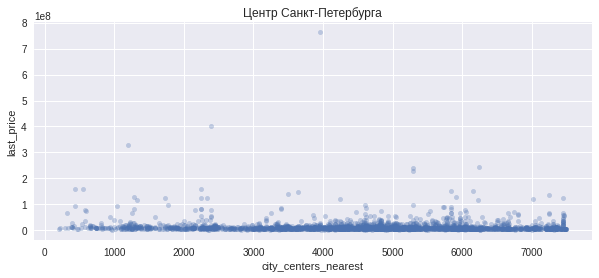

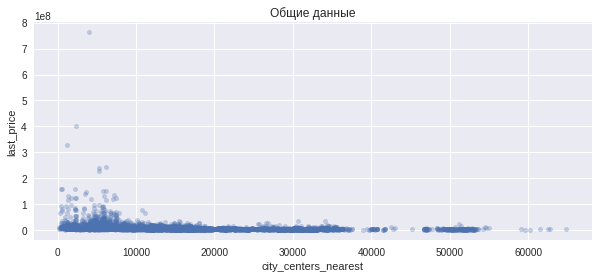

In [128]:
df_center.plot(x='city_centers_nearest', y='last_price', kind='scatter', grid=True, alpha = .3, figsize=(10,4))
plt.title('Центр Санкт-Петербурга');
plt.show()

df.plot(x='city_centers_nearest', y='last_price', kind='scatter', grid=True, alpha = .3, figsize=(10,4))
plt.title('Общие данные');
plt.show()

Самые дорогие квартиры находятся в центре Санкт-Петербурга, на наших графиках это отчетлево видно, что говорит о правильном выборе точки центра Санкт-Петербурга.

Сравним параметр этажностти недвижимости.

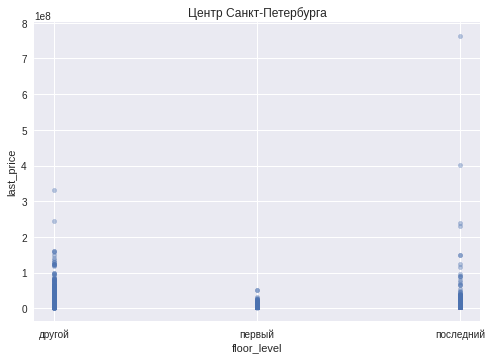

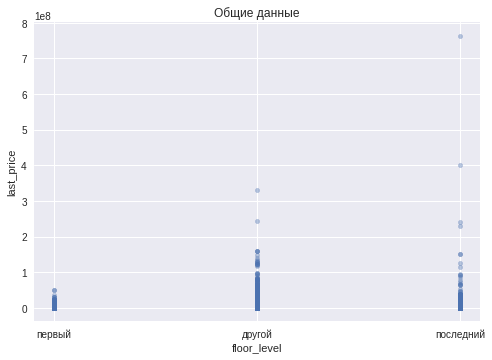

In [129]:
df_center.plot(x='floor_level', y='last_price', kind='scatter', grid=True, alpha = .4)
plt.title('Центр Санкт-Петербурга');
plt.show()

df.plot(x='floor_level', y='last_price', kind='scatter', grid=True, alpha = .4)
plt.title('Общие данные');
plt.show()

Как мы видим данные не сильно отличаются.

Посмотрим когда именно продавали квартиры в двух датафреймах.

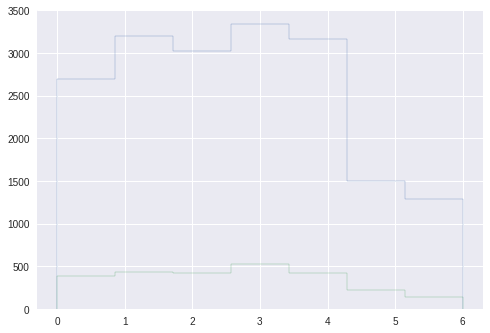

In [135]:
plt.hist([df['day_week'], df_center['day_week']], bins=7, histtype='step', facecolor='black')
plt.show()

По дням недели особых отличий нет, можно отметить что в центре Питера вторник и среда по продажам квартир примерно одинакова, в отличии от общих данных где по вторникам было больше прадаж чем в среду.

Далее посмотрим на месяц продаж недвижимости.

(array([[1140., 2075., 1678., 1314., 1068., 1541., 1419., 1464., 1611.,
         1723., 1892., 1290.],
        [ 132.,  281.,  236.,  182.,  161.,  239.,  215.,  192.,  232.,
          213.,  269.,  180.]]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <a list of 2 List[Polygon] objects>)

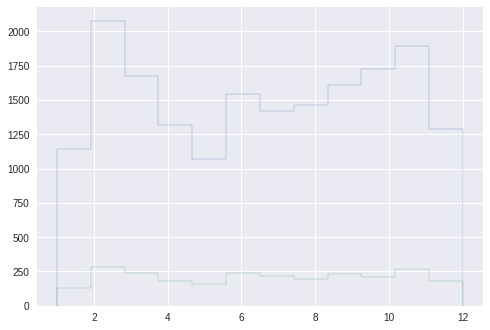

In [133]:
plt.hist([df['month_exposition'], df_center['month_exposition']], bins=12, histtype='step')

Первое получодие показывает на что продажи идут одинаково, но второе получгодие значительно отличается, если в общих данных мы видим что под конец года продажи увеличивались, то данные о продажах в центре Санкт-Петербурга отражают нестабильное колебание количества продаж и уменьшение продаж в декабре. Январь оказался самым не эффективным месяцем в плане числа проданной недвижимости в двух датафреймах.

## Общий вывод

В данном проекте был исследован рынок квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. С помощью логики и доступной информации были заполнены пропущенные значения и изменен тип данных для будущего анализа. В ходе работы в данные была добавлена информация о цене за квадратный метр, о времени публикации объявлений, соотношении площадей кухни и жилой площади к общей, а также были добавлены категории в зависимости от этажа на котором располагается недвижимость. Для основных параметров были построены гистограммы и написаны выводы, так же на гистограммах можно было отметить слишком выбивающиеся редкие значения от которых мы  в последствии избавились, например слишком мальенькая цена продажи, огромное колличество комнат, большая площадь и очень высокие потолки. Такие шумные значения могли быть ошибкой которую пользователь мог допустить внося данные о продаже, либо это мошенническая деятельность для завлечения покупателей. Были выделены топ-10 населенных пунктов в которых продавали недвижимость и Санкт-Петербург был лидером данного топа, всего в этом городе было 12 035 объявлений, также в Питере самый дорогой квадратный метр. Изучая недвижимость Санкт-Петербурга был выделен центр города, в расчет были взяты такие параметры как растояние до центра города в километрах и стоимость самой недвижимости, на основе графика построенного по параметрам было определено что центр города расположен в 7-ми километрах от центральной точки. В анализе недвижимости самого центра было выявлено что основные параметры заметно отличались от общих данных, например квартиры в центре Питера больше по площади, значение медианы - 70 кв.м, квартиры стоят намного больше, а также высота потолков в центре Питера в основном 3 метра в высоту. Коэффициент корреляции в параметрах показал что цена сильно зависит от таких параметров как: общая площадь, жилая площадь и колличество комнат. Больше площадь - больше стоимость, такую закономерность показали два датафрейма и это не удивительно, логика здесь определенно есть).